## MultiLayer Perceptron/ Feed Forward Architecture
### Implementing a 3 Layer Architecture  from Scratch!

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons,make_circles,make_classification,make_blobs


## Data Preparation

In [2]:
dataset = 'xor'

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

In [3]:
X,Y = load_dataset(dataset)
print(X.shape)
print(Y.shape)

(4, 2)
(4,)


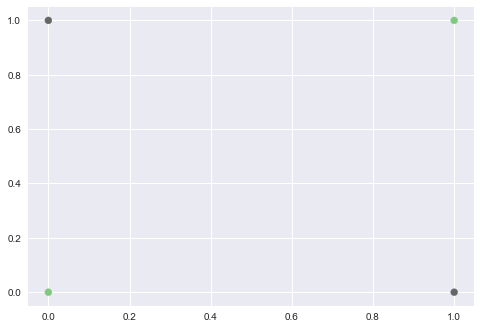

In [4]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

plt.show()

### Model Architecture

In [5]:
input_size = 2
layers = [4,3]
output_size = 2
EPOCHS=50

Example of Keeps Dims

In [6]:
 #example of keep_dims
a = np.array([[12,11],[20,20]])
np.sum(a,axis=1,keepdims=True)

array([[23],
       [40]])

In [7]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [8]:
a = np.array([[10,10],[20,20]])
a_ = softmax(a)
print(a_.shape)
print(a_)


(2, 2)
[[0.5 0.5]
 [0.5 0.5]]


In [9]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        
       

In [10]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht


In [11]:
X, Y = make_blobs(n_samples=100,
    n_features=2,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,)

In [12]:
model = NeuralNetwork(input_size=2,layers=[4,3],output_size=3)


In [13]:

def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    
    #model.summary()
    return training_loss
        

In [14]:
trainingloss = train(X,Y,model,1000)

Epoch 0 Loss 0.5474
Epoch 50 Loss 0.2104
Epoch 100 Loss 0.1801
Epoch 150 Loss 0.1758
Epoch 200 Loss 0.1734
Epoch 250 Loss 0.1717
Epoch 300 Loss 0.1704
Epoch 350 Loss 0.1692
Epoch 400 Loss 0.1682
Epoch 450 Loss 0.1672
Epoch 500 Loss 0.1662
Epoch 550 Loss 0.1651
Epoch 600 Loss 0.1638
Epoch 650 Loss 0.1621
Epoch 700 Loss 0.1590
Epoch 750 Loss 0.1533
Epoch 800 Loss 0.1483
Epoch 850 Loss 0.1439
Epoch 900 Loss 0.1559
Epoch 950 Loss 0.1596


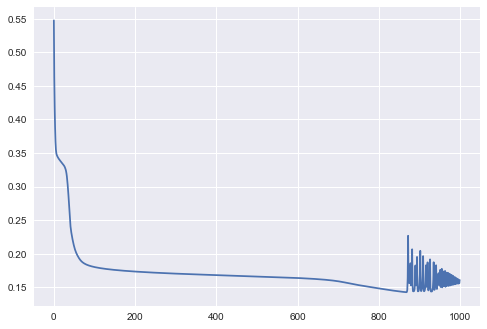

In [15]:
plt.plot(trainingloss)

## Summary

In [16]:
model.summary()

W1  (2, 4)
A1  (100, 4)
W2  (4, 3)
A2  (100, 3)
W3  (3, 3)
Y_  (100, 3)


## Visualisation

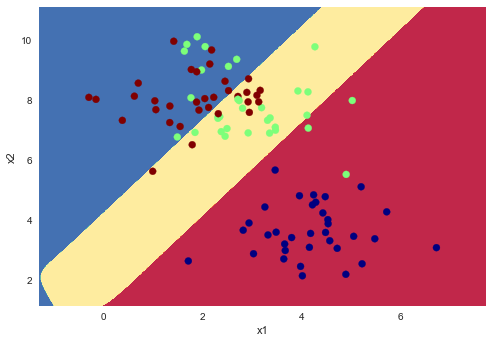

In [17]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [18]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 77.0000


### END OF NOTEBOOK ###

Training Accuracy 100.0000
Training Accuracy 96.0000
Training Accuracy 97.4000
Training Accuracy 96.4000


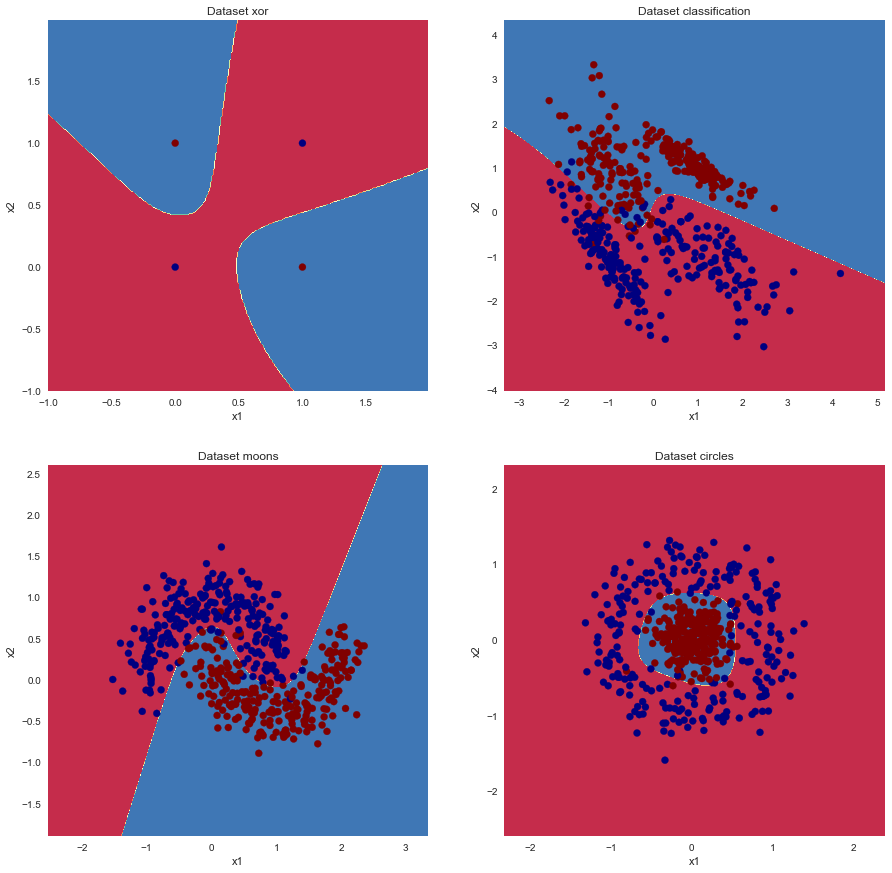

In [19]:
datasets = ["xor","classification","moons","circles"]

id = 1
plt.figure(figsize=(15,15))
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,logs=False)
    
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Accuracy %.4f"%(training_accuracy*100))
    
    no = 220+id
    
    plt.subplot(no)
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    id +=1

plt.show()

### END OF NOTEBOOK

In [20]:
X

array([[ 2.29010385e-01,  3.56231033e-01],
       [ 1.97610868e-01,  5.03342320e-03],
       [ 4.64686490e-01,  9.40511994e-01],
       [-3.28772238e-01,  7.66244976e-01],
       [ 3.13579134e-01, -3.24200918e-01],
       [ 1.99801290e-01,  2.31385925e-01],
       [-8.59684200e-02,  2.24601346e-01],
       [ 8.08485344e-01,  6.91484385e-01],
       [ 1.15707686e+00, -4.34223162e-01],
       [-5.47341607e-01,  7.53378891e-01],
       [ 1.67053168e-01,  3.04735591e-01],
       [-2.72026816e-01, -9.03758541e-01],
       [-5.00153405e-01,  3.64731080e-01],
       [-1.36634607e-01,  1.10571988e+00],
       [ 2.05947430e-01,  3.21271782e-01],
       [-3.32282240e-01, -1.59291461e+00],
       [ 2.14081137e-02,  4.04309871e-02],
       [ 9.11303217e-02, -1.85288159e-01],
       [-1.09184074e+00, -5.62719283e-01],
       [-7.36191676e-01, -4.59112069e-01],
       [ 1.51252876e-01,  1.31423698e-01],
       [ 3.53376611e-01,  1.46660268e-01],
       [-1.39301289e-02, -1.85123863e-01],
       [ 1.

In [21]:
Y


array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,